<a href="https://colab.research.google.com/github/Roshni-AngelAlex/MACHINE-LEARNING-LAB-24ADI003-/blob/main/MLLABEX5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification using K-Nearest Neighbors (KNN) and
Decision Tree**

**LAB EXPERIMENT 5**

**NAME: ROSHNI ANGEL A / ROLLNO:24BAD101**

**SCENARIO 1 – K-NEAREST NEIGHBORS (KNN)**

Problem Statement:

Predict whether a tumor is benign or malignant based on medical measurements.


**Description:**

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

NAME:ROSHNI ANGEL A,ROLLNO:24BAD101
First 5 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radi

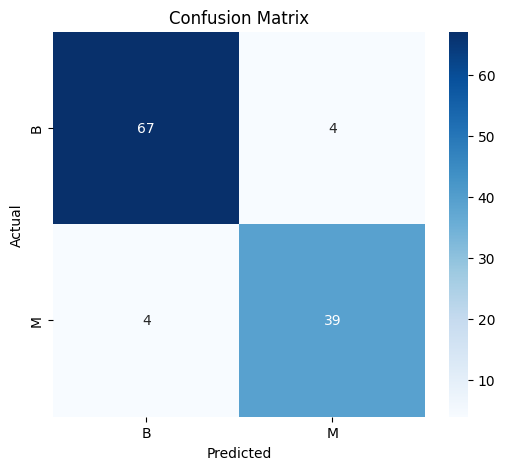

Number of Misclassified Samples: 8


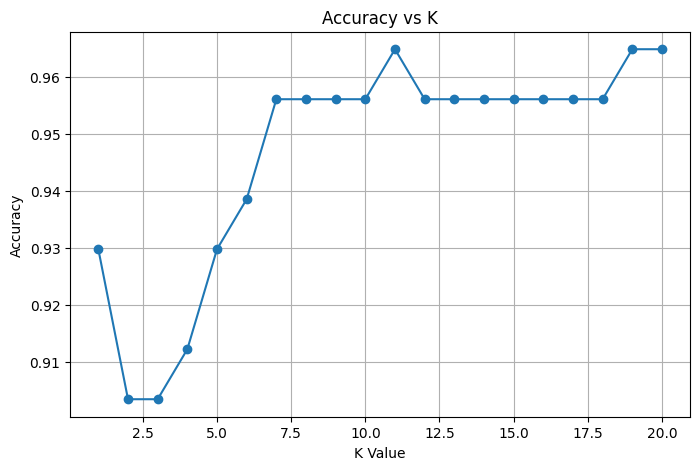

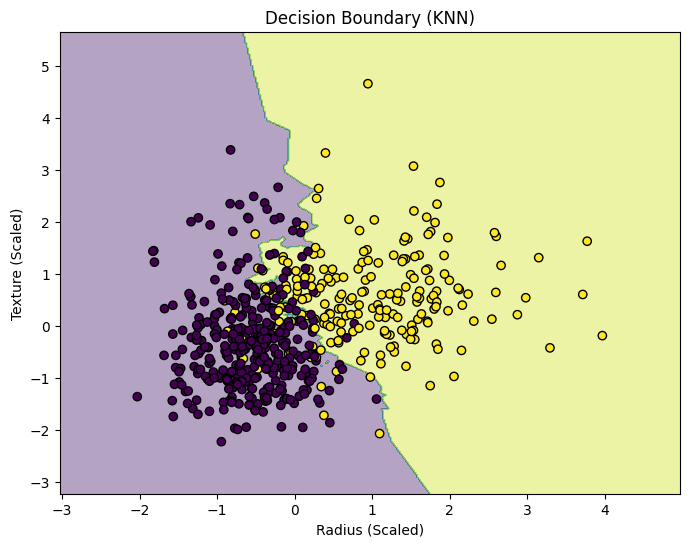

In [1]:
# SCENARIO 1 – K-NEAREST NEIGHBORS (KNN)
# KNN CLASSIFICATION - BREAST CANCER DATASET

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("NAME:ROSHNI ANGEL A,ROLLNO:24BAD101")

# 2. Load Dataset
df = pd.read_csv("/content/breast-cancer.csv")
print("First 5 Rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Select Features and Target
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean']]
y = df['diagnosis']

# 4. Encode Target Labels
le = LabelEncoder()
y = le.fit_transform(y)   # Malignant=1, Benign=0

# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. Train KNN (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. Predict
y_pred = knn.predict(X_test)

# 9. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 11. Misclassified Samples
misclassified = np.where(y_test != y_pred)
print("Number of Misclassified Samples:", len(misclassified[0]))

# 12. Accuracy vs K
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.grid(True)
plt.show()

# 13. Decision Boundary (Using 2 Features Only)
X_2 = df[['radius_mean', 'texture_mean']]
y_2 = le.fit_transform(df['diagnosis'])

scaler_2 = StandardScaler()
X_2_scaled = scaler_2.fit_transform(X_2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2_scaled, y_2, test_size=0.2, random_state=42
)

knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_2, y_train_2)

x_min, x_max = X_2_scaled[:, 0].min() - 1, X_2_scaled[:, 0].max() + 1
y_min, y_max = X_2_scaled[:, 1].min() - 1, X_2_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_2_scaled[:, 0], X_2_scaled[:, 1],
            c=y_2, edgecolor='k')
plt.xlabel("Radius (Scaled)")
plt.ylabel("Texture (Scaled)")
plt.title("Decision Boundary (KNN)")
plt.show()


**SCENARIO 2 – DECISION TREE CLASSIFIER**

Problem Statement:

Predict whether a loan application should be approved or rejected.


**Description:**

Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.
Problem:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


NAME:ROSHNI ANGEL A,ROLLNO:24BAD101
First 5 Rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.

/tmp/ipython-input-294602894.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-294602894.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

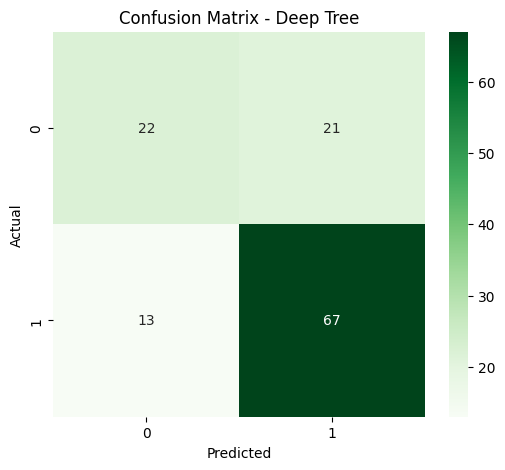

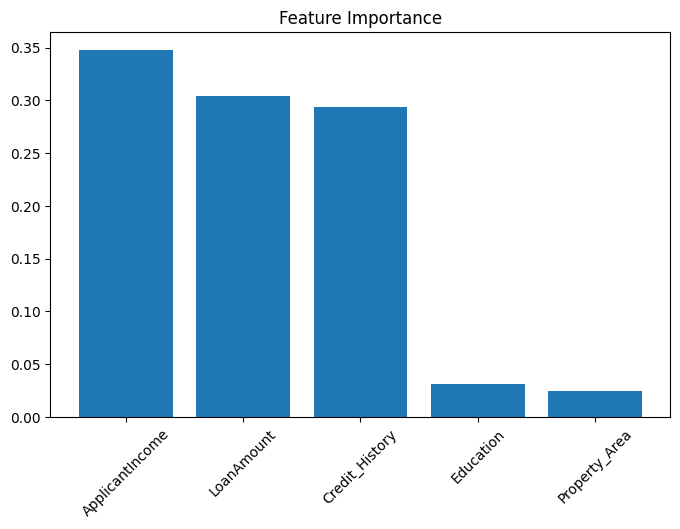


Training Accuracy (Deep Tree): 1.0
Testing Accuracy (Deep Tree): 0.7235772357723578
Model shows signs of overfitting.

--- Shallow Tree Performance ---
Training Accuracy: 0.824847250509165
Testing Accuracy: 0.7560975609756098


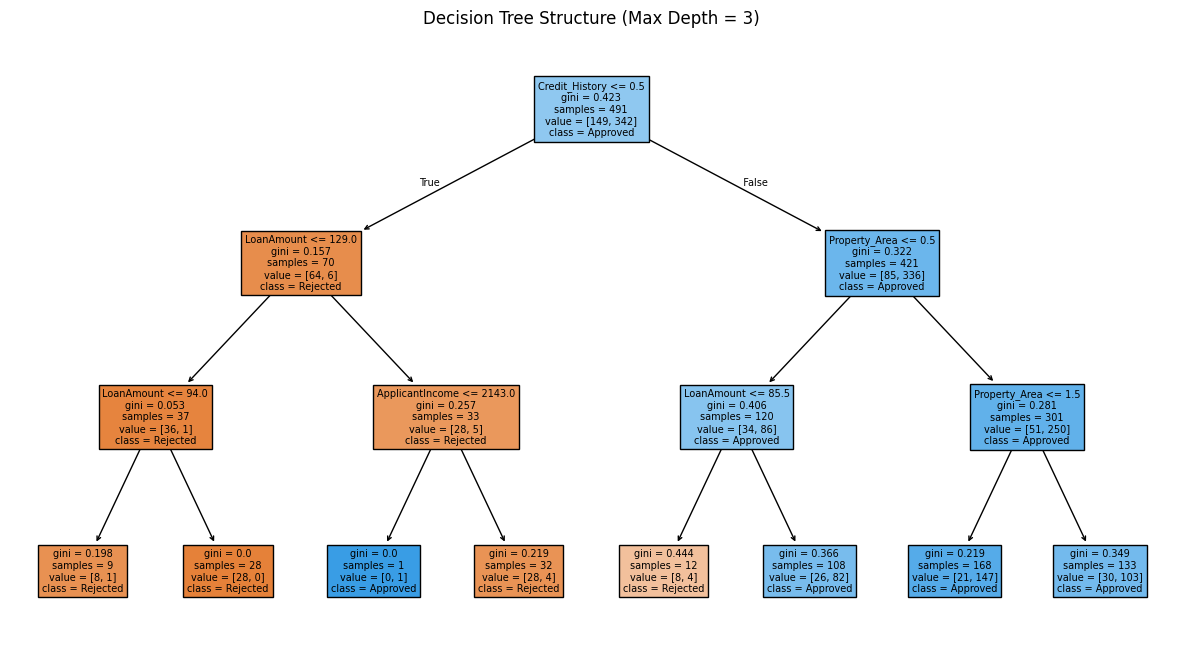

In [2]:
# SCENARIO 2 – DECISION TREE CLASSIFIER
# DECISION TREE - LOAN PREDICTION DATASET

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("NAME:ROSHNI ANGEL A,ROLLNO:24BAD101")

# 2. Load Dataset
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

print("First 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# 3. Preprocessing
# Handle missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)

# Select required features
df = df[['ApplicantIncome', 'LoanAmount', 'Credit_History',
         'Education', 'Property_Area', 'Loan_Status']]

# Encode categorical variables
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Features and Target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train Decision Tree (Deep Tree)
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train, y_train)

# 6. Train Shallow Tree (Pruned)
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

# 7. Prediction (Deep Tree)
y_pred = deep_tree.predict(X_test)

# 8. Evaluation
print("\n--- Deep Tree Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Deep Tree")
plt.show()

# 10. Feature Importance
importances = deep_tree.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.bar(feature_names, importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

# 11. Detect Overfitting
train_acc = deep_tree.score(X_train, y_train)
test_acc = deep_tree.score(X_test, y_test)

print("\nTraining Accuracy (Deep Tree):", train_acc)
print("Testing Accuracy (Deep Tree):", test_acc)

if train_acc > test_acc:
    print("Model shows signs of overfitting.")

# 12. Compare Shallow vs Deep Tree
print("\n--- Shallow Tree Performance ---")
print("Training Accuracy:", shallow_tree.score(X_train, y_train))
print("Testing Accuracy:", shallow_tree.score(X_test, y_test))

# 13. Tree Structure Plot (Shallow Tree for clarity)
plt.figure(figsize=(15,8))
plot_tree(shallow_tree,
          feature_names=feature_names,
          class_names=['Rejected', 'Approved'],
          filled=True)
plt.title("Decision Tree Structure (Max Depth = 3)")
plt.show()
